In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

In [5]:
@tf.function
def add_(x,b):
    if b:
        x+=1
    else:
        x+=10
    return x

result= add_(tf.constant(1.),True).numpy()
result

2.0

In [9]:
rand = tf.random.uniform([4,2],0,1)
print(rand)

tf.Tensor(
[[0.31598997 0.3077693 ]
 [0.2383759  0.7979194 ]
 [0.53297615 0.499125  ]
 [0.9340297  0.8015106 ]], shape=(4, 2), dtype=float32)


In [11]:
rand = tf.random.normal([4],3,1)
print(rand)

tf.Tensor([3.7548475 2.053113  3.99509   2.6158936], shape=(4,), dtype=float32)


In [12]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [13]:
x=1
y=0
w=tf.random.normal([1],0,1)
output=sigmoid(x*w)
print(output)

0.7634370481406536


In [22]:
for i in range(1000):
    output=sigmoid(x*w)
    error=y-output
    w=w+x*0.1*error
    
    if(i%100==0):
        print(error)

-0.0025351788412706876
-0.002472640798546772
-0.002413112861867221
-0.0023563784713016723
-0.0023022494221048243
-0.002250549180989936
-0.0022011161547836338
-0.002153807525213459
-0.002108486515430677
-0.002065032818156221


In [23]:
sigmoid(x*w)

0.0020233315191373535

In [25]:
x=0
y=1
w=tf.random.normal([1],0,1)

In [26]:
for i in range(1000):
    output=sigmoid(x*w)
    error=y-output
    w=w+x*0.1*error
    
    if(i%100==0):
        print(error)

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


In [28]:
x=0
y=1
w=tf.random.normal([1],0,1)
b=tf.random.normal([1],0,1)

for i in range(1000):
    output=sigmoid(x*w+b)
    error=y-output
    w=w+x*0.1*error
    b=b+1*0.1*error
    
    if(i%100==0):
        print(error,w,b)

0.10879733294792304 tf.Tensor([0.08243332], shape=(1,), dtype=float32) tf.Tensor([2.1139648], shape=(1,), dtype=float32)
0.05414466233297577 tf.Tensor([0.08243332], shape=(1,), dtype=float32) tf.Tensor([2.8658447], shape=(1,), dtype=float32)
0.03564731088403883 tf.Tensor([0.08243332], shape=(1,), dtype=float32) tf.Tensor([3.3013482], shape=(1,), dtype=float32)
0.026482470152174864 tf.Tensor([0.08243332], shape=(1,), dtype=float32) tf.Tensor([3.6070812], shape=(1,), dtype=float32)
0.021036452987715504 tf.Tensor([0.08243332], shape=(1,), dtype=float32) tf.Tensor([3.8423412], shape=(1,), dtype=float32)
0.01743543356951638 tf.Tensor([0.08243332], shape=(1,), dtype=float32) tf.Tensor([4.033405], shape=(1,), dtype=float32)
0.014880660320834238 tf.Tensor([0.08243332], shape=(1,), dtype=float32) tf.Tensor([4.1941886], shape=(1,), dtype=float32)
0.012975362582058336 tf.Tensor([0.08243332], shape=(1,), dtype=float32) tf.Tensor([4.33294], shape=(1,), dtype=float32)
0.011500454438249763 tf.Tensor(

In [29]:
import numpy as np

In [41]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[0],[0],[1]])
w=tf.random.normal([2],0,1)
b=tf.random.normal([1],0,1)

In [48]:
for i in range(1000):
    error_sum=0
    for j in range(4):
        output=sigmoid(np.sum(x[j]*w)+b)
        error=y[j]-output
        w=w+x[j]*0.1*error
        b=b+0.1*error
        error_sum+=error
    if i%100==0:
        print(error_sum)

[-0.01514644]
[-0.0144367]
[-0.01378787]
[-0.01319302]
[-0.01264869]
[-0.01214871]
[-0.01168481]
[-0.01125415]
[-0.01085384]
[-0.01048096]


In [51]:
sigmoid(np.sum(x[3]*w)+b)

0.9765184016096645

In [56]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2,activation='sigmoid',input_shape=(2,)),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3),loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [57]:
history=model.fit(x,y,epochs=2000,batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 32ms/sample - loss: 0.2647
Epoch 2/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2647
Epoch 3/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2637
Epoch 4/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2637
Epoch 5/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2637
Epoch 6/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2646
Epoch 7/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2637
Epoch 8/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2646
Epoch 9/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2645
Epoch 10/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2646
Epoch 11/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2645
Epoch 12/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2644
Epoch

4/4 [==============================] - 0s 1ms/sample - loss: 0.2624
Epoch 101/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2624
Epoch 102/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2624
Epoch 103/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2623
Epoch 104/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2613
Epoch 105/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2621
Epoch 106/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2613
Epoch 107/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2620
Epoch 108/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2621
Epoch 109/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2612
Epoch 110/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2611
Epoch 111/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2619
Epoch 112/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.2548
Epoch 198/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2544
Epoch 199/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2538
Epoch 200/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2541
Epoch 201/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2531
Epoch 202/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2533
Epoch 203/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2539
Epoch 204/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2526
Epoch 205/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2525
Epoch 206/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2524
Epoch 207/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2532
Epoch 208/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2531
Epoch 209/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.2335
Epoch 296/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2333
Epoch 297/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2339
Epoch 298/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2336
Epoch 299/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2324
Epoch 300/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2327
Epoch 301/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2319
Epoch 302/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2322
Epoch 303/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2319
Epoch 304/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2310
Epoch 305/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2317
Epoch 306/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2310
Epoch 307/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.2090
Epoch 394/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2101
Epoch 395/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2090
Epoch 396/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2092
Epoch 397/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2087
Epoch 398/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2093
Epoch 399/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2092
Epoch 400/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2090
Epoch 401/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2086
Epoch 402/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2085
Epoch 403/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2078
Epoch 404/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2080
Epoch 405/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.1962
Epoch 492/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1958
Epoch 493/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1960
Epoch 494/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1953
Epoch 495/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1948
Epoch 496/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1957
Epoch 497/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1950
Epoch 498/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1956
Epoch 499/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1955
Epoch 500/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1953
Epoch 501/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1951
Epoch 502/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1951
Epoch 503/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.1881
Epoch 590/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1887
Epoch 591/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1880
Epoch 592/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1882
Epoch 593/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1881
Epoch 594/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1888
Epoch 595/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1881
Epoch 596/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1886
Epoch 597/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1880
Epoch 598/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1885
Epoch 599/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1884
Epoch 600/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1882
Epoch 601/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.1837
Epoch 688/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1830
Epoch 689/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1836
Epoch 690/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1836
Epoch 691/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1829
Epoch 692/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1834
Epoch 693/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1833
Epoch 694/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1828
Epoch 695/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1832
Epoch 696/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1826
Epoch 697/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1827
Epoch 698/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1832
Epoch 699/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.1760
Epoch 786/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1759
Epoch 787/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1758
Epoch 788/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1752
Epoch 789/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1755
Epoch 790/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1754
Epoch 791/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1752
Epoch 792/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1745
Epoch 793/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1749
Epoch 794/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1742
Epoch 795/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1745
Epoch 796/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1745
Epoch 797/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.1456
Epoch 884/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1446
Epoch 885/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1445
Epoch 886/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1439
Epoch 887/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1429
Epoch 888/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1429
Epoch 889/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1422
Epoch 890/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1413
Epoch 891/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1408
Epoch 892/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1399
Epoch 893/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1394
Epoch 894/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1393
Epoch 895/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.0725
Epoch 982/2000
4/4 [==============================] - ETA: 0s - loss: 0.069 - 0s 3ms/sample - loss: 0.0717
Epoch 983/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0709
Epoch 984/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0702
Epoch 985/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0697
Epoch 986/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0691
Epoch 987/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0685
Epoch 988/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0678
Epoch 989/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0668
Epoch 990/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0665
Epoch 991/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0658
Epoch 992/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.

4/4 [==============================] - 0s 2ms/sample - loss: 0.0300
Epoch 1079/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0298
Epoch 1080/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0296
Epoch 1081/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0293
Epoch 1082/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0291
Epoch 1083/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0289
Epoch 1084/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0287
Epoch 1085/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0285
Epoch 1086/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0283
Epoch 1087/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0281
Epoch 1088/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0279
Epoch 1089/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0277
Epoch 10

4/4 [==============================] - 0s 2ms/sample - loss: 0.0164
Epoch 1176/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0164
Epoch 1177/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0163
Epoch 1178/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0162
Epoch 1179/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0161
Epoch 1180/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0160
Epoch 1181/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0160
Epoch 1182/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0159
Epoch 1183/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0158
Epoch 1184/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0157
Epoch 1185/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0156
Epoch 1186/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0156
Epoch 11

4/4 [==============================] - 0s 2ms/sample - loss: 0.0108
Epoch 1273/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0108
Epoch 1274/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0108
Epoch 1275/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0107
Epoch 1276/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0107
Epoch 1277/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0106
Epoch 1278/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0106
Epoch 1279/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0106
Epoch 1280/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0105
Epoch 1281/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0105
Epoch 1282/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0104
Epoch 1283/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0104
Epoch 12

4/4 [==============================] - 0s 3ms/sample - loss: 0.0079
Epoch 1370/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0079
Epoch 1371/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0079
Epoch 1372/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0079
Epoch 1373/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0078
Epoch 1374/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0078
Epoch 1375/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0078
Epoch 1376/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0078
Epoch 1377/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0078
Epoch 1378/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0077
Epoch 1379/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0077
Epoch 1380/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0077
Epoch 13

4/4 [==============================] - 0s 2ms/sample - loss: 0.0062
Epoch 1467/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0062
Epoch 1468/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0062
Epoch 1469/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0062
Epoch 1470/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 1471/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0061
Epoch 1472/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 1473/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 1474/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 1475/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 1476/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 1477/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0060
Epoch 14

4/4 [==============================] - 0s 3ms/sample - loss: 0.0051
Epoch 1564/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 1565/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 1566/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0050
Epoch 1567/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0050
Epoch 1568/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0050
Epoch 1569/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 1570/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0050
Epoch 1571/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0050
Epoch 1572/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 1573/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 1574/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0050
Epoch 15

4/4 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 1661/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 1662/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0042
Epoch 1663/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0042
Epoch 1664/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0042
Epoch 1665/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0042
Epoch 1666/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0042
Epoch 1667/2000
4/4 [==============================] - ETA: 0s - loss: 0.004 - 0s 3ms/sample - loss: 0.0042
Epoch 1668/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0042
Epoch 1669/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0042
Epoch 1670/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0042
Epoch 1671/2000
4/4 [==============================] - 0s 3ms/sample

4/4 [==============================] - 0s 2ms/sample - loss: 0.0037
Epoch 1758/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0037
Epoch 1759/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0037
Epoch 1760/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0037
Epoch 1761/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0036
Epoch 1762/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0036
Epoch 1763/2000
4/4 [==============================] - ETA: 0s - loss: 0.003 - 0s 2ms/sample - loss: 0.0036
Epoch 1764/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0036
Epoch 1765/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0036
Epoch 1766/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0036
Epoch 1767/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0036
Epoch 1768/2000
4/4 [==============================] - 0s 2ms/sample

4/4 [==============================] - 0s 2ms/sample - loss: 0.0032
Epoch 1855/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0032
Epoch 1856/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0032
Epoch 1857/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0032
Epoch 1858/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0032
Epoch 1859/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0032
Epoch 1860/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0032
Epoch 1861/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0032
Epoch 1862/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0032
Epoch 1863/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0032
Epoch 1864/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0032
Epoch 1865/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0032
Epoch 18

4/4 [==============================] - 0s 2ms/sample - loss: 0.0029
Epoch 1952/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0029
Epoch 1953/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0028
Epoch 1954/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1955/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1956/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0028
Epoch 1957/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1958/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1959/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1960/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1961/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 1962/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0028
Epoch 19

In [58]:
model.predict(x)

array([[0.04390031],
       [0.9459767 ],
       [0.94598746],
       [0.05468971]], dtype=float32)

In [59]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 3.8753037, -6.0983768],
       [ 3.87476  , -6.09427  ]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-6.0053873,  2.2021236], dtype=float32)>
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.8722367],
       [-7.677994 ]], dtype=float32)>
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([3.851993], dtype=float32)>


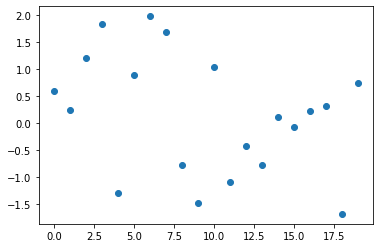

In [65]:
import matplotlib.pyplot as plt
x=range(20)
y=tf.random.normal([20],0,1)
plt.plot(x,y,'o')
plt.show()

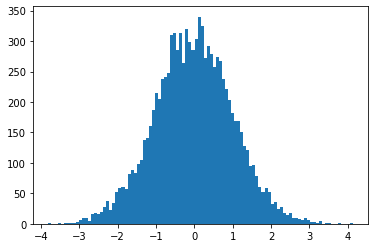

In [66]:
x=tf.random.normal([10000],0,1)
plt.hist(x,bins=100)
plt.show()

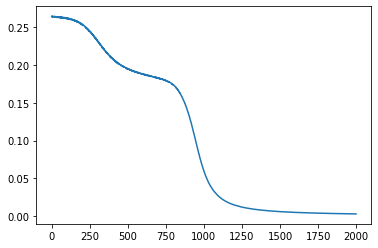

In [67]:
plt.plot(history.history['loss'])